# Import Needed Libraries

In [33]:
import torch
from torch import optim, nn, utils
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt
import numpy as np

# Run on GPU if available

In [34]:
run_gpu = torch.cuda.is_available()
print('GPU') if run_gpu else print('CPU')

GPU


# Define Transform

In [35]:
transform_train = transforms.Compose(
    [
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

transform_test = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
    ]
)

# Define datasets

In [36]:
trainset = datasets.ImageFolder(
    root='./data/train/',
    transform=transform_train
)

testset = datasets.ImageFolder(
    root='./data/test/',
    transform=transform_train
)

# Define dataloader

In [37]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=32, 
    shuffle=True,
    num_workers=2
)

trainloader = torch.utils.data.DataLoader(
    testset,
    batch_size=32, 
    shuffle=False,
    num_workers=2
)

# Define class

In [38]:
classes = ('cat', 'dog')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


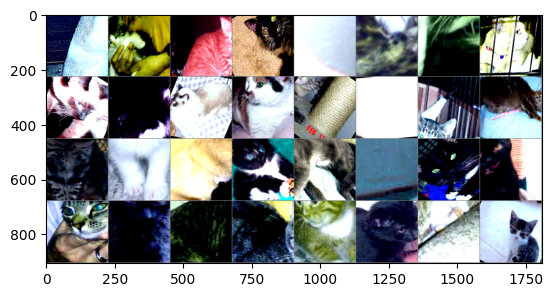

dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog   dog  


In [39]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()
    
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show image
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))